In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('diabetes-prediction')
jovian.set_colab_id('1Vw_PvciTqUpxYF1TEoVzo28XpG-brv-3')

     |████████████████████████████████| 68 kB 3.4 MB/s 


# diabetes-prediction

Use the "Run" button to execute the code.

In [2]:
!pip install jovian --upgrade --quiet

In [4]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="diabetes-prediction")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/ankii135180/diabetes-prediction


'https://jovian.ai/ankii135180/diabetes-prediction'

### DATA PREPAIRING AND CLEANING

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [105]:
df=pd.read_csv('/content/diabetes.csv')

In [106]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [107]:
df.shape

(768, 9)

In [108]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [109]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [110]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [111]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### DATA VISUALISATION

([<matplotlib.axis.XTick at 0x7fba8e86fad0>,
 [Text(0, 0, 'No Diabetes'), Text(0, 0, 'Diabetes')])

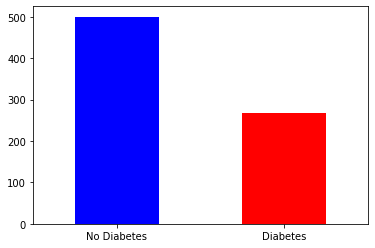

In [112]:
df["Outcome"].value_counts().plot(kind="bar",color=["Blue","Red"])
plt.xticks(np.arange(2),('No Diabetes','Diabetes'),rotation=0)

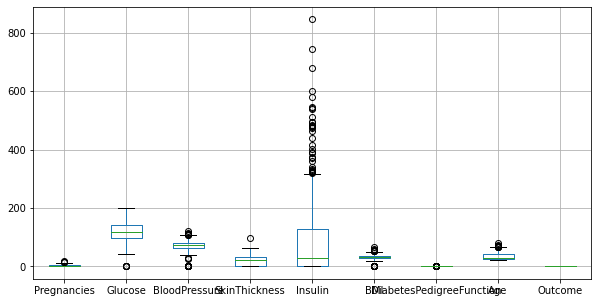

In [16]:
df.boxplot(figsize=(10,5))
plt.show()

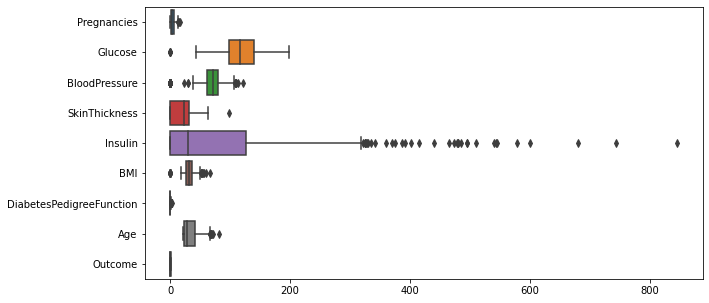

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,orient='h')
plt.show()

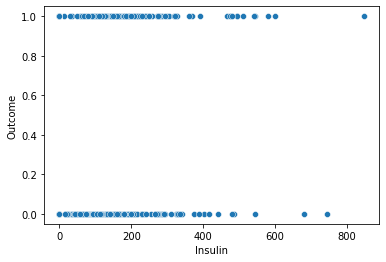

In [18]:
sns.scatterplot(x=df['Insulin'],y=df['Outcome'])
plt.show()

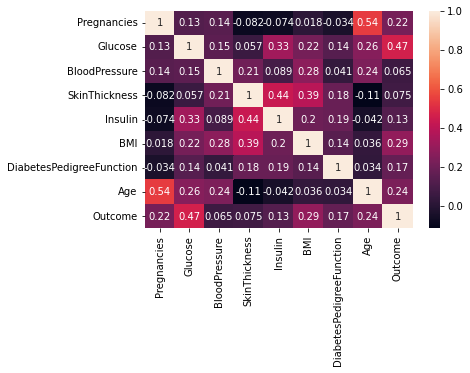

In [19]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [22]:
#replacing 0 with respected mean values
#using X to store all values except Outcome so Outcome dosnt effect while filling mean values in place of 0s
X=df.drop('Outcome',axis=1)
X=X.drop('DiabetesPedigreeFunction',axis=1)

In [24]:
#storing Outcome sequencial manner
Y=df['Outcome']

In [25]:
X.replace(to_replace=0,value=X.mean(),inplace=True)

In [26]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,33


### DATA PREPROCESSING

In [120]:
#splitting the data for trainging and testing purpose
from sklearn.model_selection import train_test_split

In [121]:
#splitting randomly in 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [83]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
596,3.845052,67.0,76.0,20.536458,79.799479,45.3,46
90,1.000000,80.0,55.0,20.536458,79.799479,19.1,21
734,2.000000,105.0,75.0,20.536458,79.799479,23.3,53
694,2.000000,90.0,60.0,20.536458,79.799479,23.5,25
517,7.000000,125.0,86.0,20.536458,79.799479,37.6,51
...,...,...,...,...,...,...,...
360,5.000000,189.0,64.0,33.000000,325.000000,31.2,29
709,2.000000,93.0,64.0,32.000000,160.000000,38.0,23
439,6.000000,107.0,88.0,20.536458,79.799479,36.8,31
174,2.000000,75.0,64.0,24.000000,55.000000,29.7,33


In [84]:
Y_train

596    0
90     0
734    0
694    0
517    0
      ..
360    1
709    1
439    0
174    0
122    0
Name: Outcome, Length: 614, dtype: int64

In [118]:
Y_train.value_counts()

0    398
1    216
Name: Outcome, dtype: int64

In [85]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [86]:
X_train_std

array([[-0.18399412, -1.85247711,  0.34660502, ..., -0.42053829,
         1.840358  ,  1.09138367],
       [-1.13763308, -1.41095112, -1.37497665, ..., -0.42053829,
        -1.90618278, -1.0400081 ],
       [-0.80244099, -0.5618627 ,  0.26462494, ..., -0.42053829,
        -1.30559227,  1.68817336],
       ...,
       [ 0.53832737, -0.49393563,  1.33036598, ..., -0.42053829,
         0.62487721, -0.18745139],
       [-0.80244099, -1.58076881, -0.63715594, ..., -0.68871379,
        -0.39040674, -0.01694005],
       [-0.80244099, -0.49393563,  0.18264486, ..., -0.2020948 ,
         0.16728445, -0.86949676]])

### DATA MODELLING

In [87]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [123]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [91]:
#Support Vector Machine
from sklearn.svm import SVC
svm = SVC()

In [122]:
svm.fit(X_train, Y_train)

SVC()

In [ ]:
#Checking the accuracy
Y_pred_lr = lr.predict(X_test)
Y_pred_svm = svm.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)

In [96]:
print("Logistic Regression: " + str(accuracy_lr * 100))
print("SVM: " + str(accuracy_svm * 100))

Logistic Regression: 33.76623376623377
SVM: 81.81818181818183


In [75]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_svm)
cm

array([[87, 12],
       [23, 32]])

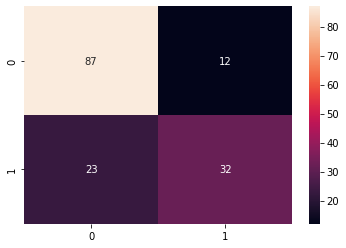

In [76]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [77]:
#saving model into file
import pickle
with open('model_pickle.pkl','wb') as f:
    pickle.dump(lr,f)
with open('model_pickle.pkl','rb') as f:
    mp = pickle.load(f)

In [119]:
mp.predict([[6,148,72,35,79,33.6,50]])

array([1])